# Ejercicios introducción a Julia 

## Ejercicio 1: 
Crear un vector aleatorio de 20 entradas usando la función `rand` y luego ordenarlo utilizando `sort!`, y luego reordenarlo en orden decreciente con `reverse!`. Luego, haga una copia de ese vector y asegurese de que la copia no esta referenciada al vector original

In [ ]:
ran_vec = zeros(20)
for i in 1:20
    ran_vec[i] = rand()
end
println(ran_vec)

#Sort! reescribe el vector original
sort!(ran_vec)
reverse!(ran_vec)
copia_vec = copy(ran_vec)
println(copia_vec)
#Modificar el vector original
ran_vec[1]=0.0
println(ran_vec)
println(copia_vec)
#Para vectores y matrices copy funciona igual que deepcopy la copia no se ve modificada cuando modificamos 
#el vector que se está copiando


Otro Método ¿Cuál es la diferencia en la eficiencia comparado con el anterior?

In [ ]:
ran_vec_1 = rand(Float64, 20)
println(ran_vec_1)

#Sort! reescribe el vector original en orden ascendente
sort!(ran_vec_1)
#Reverse! reescribe el vector original en orden decreciente
reverse!(ran_vec_1)
copia_vec_1 = copy(ran_vec_1)
println(copia_vec_1)
#Modificar el vector original
ran_vec_1[1]=0.0
println(ran_vec_1)
println(copia_vec_1)

## Ejercicio 2: 
Crear una rutina que calcule las raíces de la siguiente ecuación trascendental (como función de $A$ y con una tolerancia $\epsilon$ , es decir, que el cambio entre el último y penúltimo resultado sea igual o menor a $\epsilon$): 
$$
x \tan{x}=\sqrt{A-x^2},
$$
esta ecuación tiene interes en la física cuántica de particulas en una dimensión, en particular, sus soluciones estan directamente relacionadas con las eigenenergias del _pozo finito cuadrado_, y el número de soluciones posibles es precisamente el número de _estados ligados o acotados_ que caben en el pozo.
- Usar varias condiciones iniciales para encontrar todas las raíces en un rango considerable (Por ejemplo entre -10 y 10).
- Graficar la función y las raíces encontradas.

In [ ]:
using Plots
using LaTeXStrings
using MTH229

function f(x, A)
    return x * tan(x) - sqrt(A - x^2)
end

function Raiz(x_0, A, tol, max_iter=1000)
    x = x_0
    for i in 1:max_iter
        fx = f(x, A)
        f_prime = tan(x) + x * sec(x)^2 + x / sqrt(A - x^2)
        x = x - fx/f_prime
        if abs(fx) < tol
            #println("Converge en la iteración $i.")
            return x
        end
    end
    println("El método no converge en $max_iter iteraciones.")
end

function Soluciones(A, rango, tol)
    raices = []
    for x_0 in rango
        try
            raiz = Raiz(x_0, A, tol)
            if all(abs(raiz - r) > tol for r in raices)
                push!(raices, raiz)
            end
        catch
            # Ignorar errores de dominio o división por cero
        end
    end
    return raices
end

# Parámetros
A = 20.0
rango = -10:0.1:10
tol = 1e-6

# Encontrar y graficar las raíces
raices = Soluciones(A, rango, tol)
println("Raíces encontradas: ", raices)

f(x) = x * tan(x) - sqrt(A - x^2)
# Graficar la función
plot(rangeclamp(f),-5,5, label=L"f(x) = x \tan(x) - \sqrt{20 - x^2}", color="blue")
scatter!(raices, [0 for r in raices], label="Raíces", color="red")
ylims!(-6.5, 6)
xlabel!("x")
ylabel!("f(x)")



Otra forma de visualizar las soluciones a: $x\tan{x}=\sqrt{A-x^2}$

Para graficar las referencias siguientes son útiles
- https://mth229.github.io/graphing.html
- https://aprendeconalf.es/manual-julia/graficos.html
- https://docs.juliaplots.org/dev/tutorial/

In [ ]:
g(x)=x*tan(x)
h(x)=sqrt(A-x^2)
plot(rangeclamp(g),-10,10, label=L"g(x) = x \tan(x)", color="purple")
plot!(rangeclamp(h),-10,10, label=L"h(x) = \sqrt{20 - x^2}", color="green")
ylims!(-6.5, 9)
xlabel!("x")
ylabel!("f(x)")

## Ejercicio 3:
Crear una rutina que busque raíces de cualquier función, usando el método de Newton. Para la parte de la derivada utilice la derivada numérica. La función entonces debe depender de la diferencia finíta que utilicen.


- ¿El método converge a las raíz? (pruebe con varias funciones, tales como $x^2 - 4$, etc.)
- Para analizar el punto anterior, estudie la convergencia para varias condiciones iniciales y grafique en cuantos pasos se llega a la raíz dada una tolerancia $\epsilon$ y respecto a la diferencia finita utilizada. Es decir, grafique $N(\Delta x)$ donde $N$ es el número de pasos necesarios para llegar a la raíz, $\Delta x$ es la diferencia finita. Puede hacerlo para cada condición inicial o calcular el promedio.

In [2]:
function Newton_Raphson_0(f, x0, h, tol, maxIter = 100)
    # Los argumentos de la función son.
    #La función para l que se quiere encontrar la raíz f.
    #La aproximación inicial a la raíz x0.
    #La diferencia finita h.
    #La tolerancia para encontrar la raiz tol.
    fp(x) = (f(x+h) - f(x))/h   # forward numerical derivative 
    x = x0
    fx = f(x0)
    fp = fp(x0)
    iter = 0
    while abs(fx) > tol && iter < maxIter
        x = x  - fx/fp   
        fx = f(x)           # Precompute f(x)
        iter += 1
    end
    return x
end


f(x) = x^2 - 4
Newton_Raphson_0(f, 1.5, 1e-10, 1e-6)

2.0000001659542415

In [32]:
function Newton_Raphson(f, x0, h, tol, max_iter = 100)
    fp(x) = (f(x+h) - f(x))/h   # forward numerical derivative 
    x = x0
    fx = f(x0)
    fp = fp(x0)
    iter = 0
    if fx == 0
        print("La raíz es $x0.")
    else
        while abs(fx) > tol && iter < max_iter
            x = x - fx/fp
            fx = f(x) 
            iter = iter + 1
        end
        if abs(fx) > tol
            println("El método no converge en $max_iter iteraciones.")
        else
            #println("El método convergen en $iter iteraciones a la raíz $x con una tolerancia de $tol.")
        end
        return iter,x
    end
end



f(x) = x^2 - 4
Newton_Raphson(f, 1.5, 1.4, 1e-6)

(7, 1.999999925169143)

Raíces encontradas: Any[7, 6, 1, 5, 4, 3, 5, 5, 6, 7, 7, 8, 8, 9, 9, 9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 39, 39, 39, 40, 40, 40]


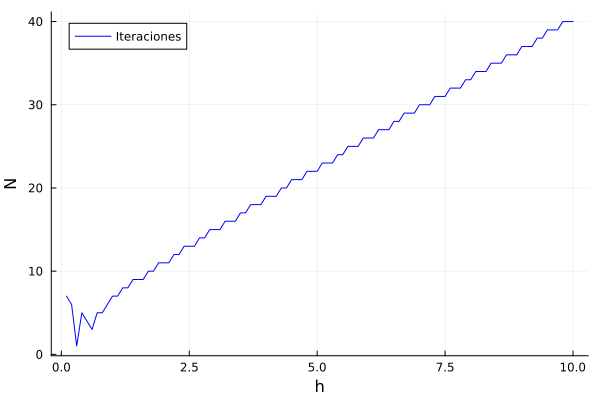

In [16]:
using Plots
function Nsteps(f, x0, rango, tol)
    steps = []
    for h in rango
            N = Newton_Raphson(f, x0, h, tol)
            push!(steps, N)
    end
    return steps
end

# Parámetros
rango = 0.1:0.1:10
tol = 1.0e-6
x0 = 1.7

# Encontrar y graficar las raíces
y = Nsteps(f, x0, rango, tol)
println("Raíces encontradas: ", y)

# Graficar la función
plot(rango, y, label="Iteraciones", color="blue")
xlabel!("h")
ylabel!("N")

Caos generado en el método de Newton-Raphnson al tener raices complejas. Ejemplo con $f(x) = x^2+4$

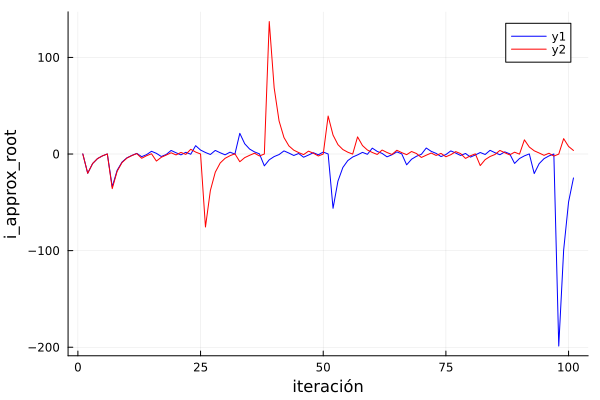

In [26]:
function i_approx_Root(x_0, max_iter)
    iteracion = [x_0]
    x = x_0
    for i in 1:max_iter
        fx = f(x)
        f_prime = 2x
        x = x - fx/f_prime
        push!(iteracion, x)
    end
    return iteracion
end

#parametros
x_0 = 0.1001
x_1 = 0.1000
max_iter = 100
k = max_iter +1

# Encontrar y graficar las raíces
approx_roots = i_approx_Root(x_0, max_iter)
approx_roots_2 = i_approx_Root(x_1, max_iter)
#println("Raíces encontradas: ", approx_roots)

# Graficar la función
plot(1:1:k, approx_roots, color="blue")
plot!(1:1:k, approx_roots_2, color="red")
xlabel!("iteración")
ylabel!("i_approx_root")

De nuevo pero ahora la función que arroja el arreglo de los resoltados de las iteraciones del método depende de la función $f(x)$ para la cual se quiere encontrar la raiz

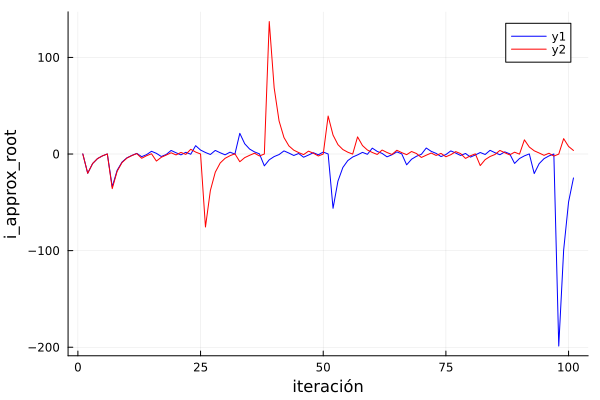

In [31]:
function i_approx_Root(f, x_0, max_iter)
    iteracion = [x_0]
    x = x_0
    for i in 1:max_iter
        fx = f(x)
        fp = f(x-1) - f(x)
        x = x - fx/fp
        push!(iteracion, x)
    end
    return iteracion
end

#parametros
x_0 = 0.1001
x_1 = 0.1000
max_iter = 100
k = max_iter +1
f(x) = x^2 + 4

# Encontrar y graficar las raíces
approx_roots = i_approx_Root(x_0, max_iter)
approx_roots_2 = i_approx_Root(x_1, max_iter)
#println("Raíces encontradas: ", approx_roots)

# Graficar la función
plot(1:1:k, approx_roots, color="blue")
plot!(1:1:k, approx_roots_2, color="red")
xlabel!("iteración")
ylabel!("i_approx_root")

In [27]:
#Exponente de lyaponuv
function lambda(approx_roots)
    return sum(log(abs((1+4/x^2)/2)) for x in approx_roots)/max_iter 
end

# Calcular el exponente de Lyapunov
lyapunov_exp = lambda(approx_roots)
println("Exponente de Lyapunov para x0 = 0.1001: ", lyapunov_exp)

Exponente de Lyapunov para x0 = 0.1001: 0.7366710339395479


Newton-Raphson en los complejos 

In [ ]:
function Newton_Raphson(f, x0, h, tol, max_iter = 100)
    fp(x) = (f(x+h) - f(x))/h   # forward numerical derivative 
    x = x0
    fx = f(x0)
    fp = fp(x0)
    iter = 0
    if fx == 0
        print("La raíz es $x0.")
    else
        while abs(fx) > tol && iter < max_iter
            x = x - fx/fp
            fx = f(x) 
            iter = iter + 1
        end
        if abs(fx) > tol
            println("El método no converge en $max_iter iteraciones.")
        else
            #println("El método convergen en $iter iteraciones a la raíz $x con una tolerancia de $tol.")
        end
        return x
    end
end


#prueba
f(x) = x^4 + 4
#tol = 1e-6
#h0 = 1.4
#x0 = 1+2im
#Newton_Raphson(f, x0, h0, tol)


function Complex_NR(f, grid)
    solutions = []
    for z in grid
        root = Newton_Raphson(f, z)
        push!(solutions, (z, sol))
    end
    return solutions
end 


# Definir los rangos para la parte real e imaginaria
real_range = range(-2, stop=2, length=50)
imag_range = range(-2, stop=2, length=50)
# Crear la cuadrícula de números complejos
grid = [x+y*im for x in -2:0.1:2, y in -2:0.1:2]

Complex_NR(f, grid) 


## Ejercicio 4: 
En el ejercico anterior, dada la diferencia finíta, nos vemos obligados a evaluar la función una vez más solo para calcular la derivada. Consideremos ahora cambiar la diferencia finíta por $\Delta x = x_n-x_{n-1}$. Ahora ya no tenemos el parámetro libre de la diferencia finíta. Simplifique la expresión a iterar y haga una rutina que calcule las raíces de una función dada con este nuevo método y compare la convergencia con el método de Newton.